# Sentiment Analysis using NLP

This project performs sentiment analysis using text preprocessing, TF-IDF vectorization, and Logistic Regression.

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemm = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Load dataset (update filename if needed)
df = pd.read_csv("data.csv")
df = df.rename(columns={"Sentence": "text", "Sentiment": "label"})
df.head()

,text,label
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [7]:
df.columns

Index(['text', 'label'], dtype='object')

In [9]:
df.dropna(inplace=True)
df = df[df['text'].str.strip().astype(bool)]
df.reset_index(drop=True, inplace=True)

In [11]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    words = [lemm.lemmatize(w) for w in words]
    return ' '.join(words)

In [13]:
df['clean_text'] = df['text'].apply(clean_text)
df.head()

,text,label,clean_text
0,The GeoSolutions technology will leverage Bene...,positive,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter componenta net sale doubled eurm ...
3,According to the Finnish-Russian Chamber of Co...,neutral,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remaining percent sta...


In [15]:
df['label'] = df['label'].astype('category').cat.codes
df['label'].unique()

array([2, 0, 1], dtype=int8)

In [17]:
df = df[df['label'] != 1]
df['label'] = df['label'].map({0: 0, 2: 1})

In [19]:
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [25]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7495395948434622
              precision    recall  f1-score   support

           0       0.75      0.31      0.44       172
           1       0.75      0.95      0.84       371

    accuracy                           0.75       543
   macro avg       0.75      0.63      0.64       543
weighted avg       0.75      0.75      0.71       543



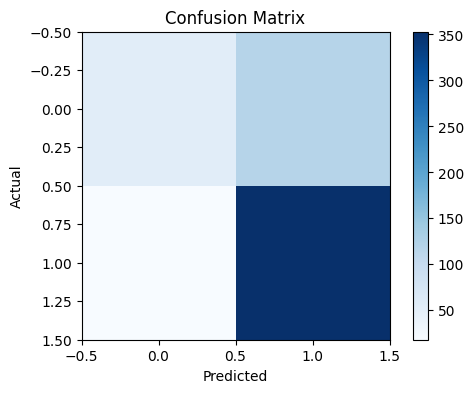

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.show()

In [45]:
def predict_sentiment(text):
    text_clean = clean_text(text)
    vector = tfidf.transform([text_clean])
    pred = model.predict(vector)[0]
    return "Positive" if pred == 0 else "Negative"

predict_sentiment("This product is really bad")

'Negative'

In [31]:
df['label'].value_counts()


label
1    1852
0     860
Name: count, dtype: int64